In [1]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing, metrics, model_selection 
import pandas as pd

In [2]:
df = pd.read_csv('../Datos/Iris.csv')

# Tomamos todas las columnas menos la última
X = np.array(df.iloc[:, 0:-1])
Y = np.array(df.iloc[:,-1])
encoder = preprocessing.LabelEncoder()
Y = encoder.fit_transform(Y)
Y_bin= to_categorical(Y)

In [3]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( \
        X, Y_bin, test_size=0.20) #, random_state=42)


In [4]:
normalizarEntrada = 1  # 1 si normaliza; 0 si no

if normalizarEntrada:
    # Escala los valores entre 0 y 1
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)

### Definición del modelo

In [5]:
# Crear un modelo de capas secuenciales
model=Sequential()

# Agregar las capas al modelo
model.add(Dense(2, input_shape=[4], activation='tanh'))
model.add(Dense(3, activation='softmax'))

# Imprimir un resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Configuración para entrenamiento
model.compile(optimizer=SGD(lr=0.1), loss='categorical_crossentropy', metrics='accuracy')

In [7]:
es = EarlyStopping(monitor='val_accuracy', patience=30, min_delta=0.0001)

H = model.fit(x = X_train, y = Y_train, epochs=4000, batch_size = 20, 
              validation_data = (X_test, Y_test),  callbacks=[es])

Epoch 1/4000
6/6 [==============================] - 0s 55ms/step - loss: 1.2067 - accuracy: 0.3250 - val_loss: 1.1453 - val_accuracy: 0.3667
Epoch 2/4000
6/6 [==============================] - 0s 4ms/step - loss: 1.1344 - accuracy: 0.3000 - val_loss: 1.0991 - val_accuracy: 0.3667
Epoch 3/4000
6/6 [==============================] - 0s 3ms/step - loss: 1.0823 - accuracy: 0.4917 - val_loss: 1.0626 - val_accuracy: 0.6333
Epoch 4/4000
6/6 [==============================] - 0s 5ms/step - loss: 1.0424 - accuracy: 0.6250 - val_loss: 1.0292 - val_accuracy: 0.6667
Epoch 5/4000
6/6 [==============================] - 0s 4ms/step - loss: 1.0061 - accuracy: 0.6583 - val_loss: 0.9960 - val_accuracy: 0.6667
Epoch 6/4000
6/6 [==============================] - 0s 5ms/step - loss: 0.9711 - accuracy: 0.6583 - val_loss: 0.9623 - val_accuracy: 0.6667
Epoch 7/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.9362 - accuracy: 0.6583 - val_loss: 0.9274 - val_accuracy: 0.6667
Epoch 8/4000
6/6 [=

Epoch 59/4000
6/6 [==============================] - 0s 5ms/step - loss: 0.4061 - accuracy: 0.9167 - val_loss: 0.3707 - val_accuracy: 1.0000
Epoch 60/4000
6/6 [==============================] - 0s 5ms/step - loss: 0.4018 - accuracy: 0.9250 - val_loss: 0.3674 - val_accuracy: 1.0000
Epoch 61/4000
6/6 [==============================] - 0s 4ms/step - loss: 0.3991 - accuracy: 0.9250 - val_loss: 0.3638 - val_accuracy: 1.0000
Epoch 62/4000
6/6 [==============================] - 0s 5ms/step - loss: 0.3971 - accuracy: 0.9500 - val_loss: 0.3602 - val_accuracy: 1.0000
Epoch 63/4000
6/6 [==============================] - 0s 5ms/step - loss: 0.3934 - accuracy: 0.9250 - val_loss: 0.3569 - val_accuracy: 1.0000
Epoch 64/4000
6/6 [==============================] - 0s 6ms/step - loss: 0.3906 - accuracy: 0.9167 - val_loss: 0.3537 - val_accuracy: 1.0000
Epoch 65/4000
6/6 [==============================] - 0s 5ms/step - loss: 0.3883 - accuracy: 0.9250 - val_loss: 0.3508 - val_accuracy: 1.0000
Epoch 66/4000

In [8]:
print("épocas = %d" % len(H.history["val_accuracy"]))   
print("Epocas = %d" % es.stopped_epoch)

épocas = 73
Epocas = 72


In [9]:
# predecir la salida del modelo
Y_pred = model.predict(X_train)
Y_pred2 = np.argmax(Y_pred,axis=1)

Y_true =  np.argmax(Y_train,axis=1)

print("%% aciertos X_train : %.3f" % metrics.accuracy_score(Y_true, Y_pred2))

% aciertos X_train : 0.950


In [10]:
report = metrics.classification_report(Y_true, Y_pred2)
print("Confusion matrix Training:\n%s" % report) 

MM = metrics.confusion_matrix(Y_true, Y_pred2)
print("Confusion matrix:\n%s" % MM)

Confusion matrix Training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.85      0.92        40
           2       0.87      1.00      0.93        41

    accuracy                           0.95       120
   macro avg       0.96      0.95      0.95       120
weighted avg       0.96      0.95      0.95       120

Confusion matrix:
[[39  0  0]
 [ 0 34  6]
 [ 0  0 41]]


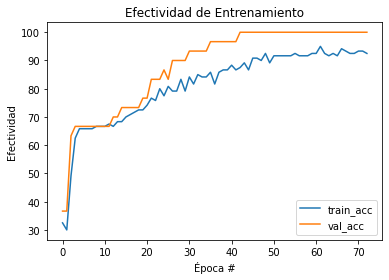

In [11]:
# dibuja accuracy del progreso del entrenamiento
accuracy = np.array(H.history["accuracy"])
val_accuracy = np.array(H.history["val_accuracy"])

N = np.arange(0, len(accuracy))
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, 100*accuracy, label="train_acc")
plt.plot(N, 100*val_accuracy, label="val_acc")
plt.title("Efectividad de Entrenamiento")
plt.xlabel("Época #")
plt.ylabel("Efectividad")
plt.legend(loc="lower right")